<h2 style="text-align: left; color: red;">Librerías importadas</h2>

A continuación, se describe el uso de cada librería en nuestro proyecto:
- pandas y numpy: Se usan para el manejo óptimo de los archivos "csv", ya que manejarlos en su mismo formato lo vuelve complejo de forma innecesaria.
- matplotlib y seaborn: Se usan para la obtencion de diagramas y gráficas de los datos.
- sklearn: Se usó esta librería contiene todos los métodos de imputación a usarse previo al modelado.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import joblib
import os
import shutil
import time 
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# LightGBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

# Configuración
warnings.filterwarnings('ignore')

<h3 style="text-align: left; color: red;">Lectura de csv's</h3>

Leemos los archivos que se encuentran en la carpeta desde donde se ejecuta el código y los movemos a la carpeta "Archivos No Imputados"

In [20]:
ruta_archivos_csv_origen = os.getcwd() 
ruta_archivos_csv_destino = os.path.join(ruta_archivos_csv_origen, "Archivos No Imputados")
# Creamos la carpeta con la ruta de destino
os.makedirs("Archivos No Imputados", exist_ok=True) 

def leer_mover_archivos(nombre_archivo_csv):
    '''
    Lee y ordena los archivos en la carpeta "Archivos No Imputados".
    
    Parametros:
    nombre_archivo_csv: str
        Nombre del archivo csv.
    
    Retorna:
    archivo_pandas
        Dataframe en formato pandas del archivo csv.
    '''
    ruta_origen_archivos_csv = os.path.join(ruta_archivos_csv_origen, nombre_archivo_csv) 
    ruta_carpeta_archivos_csv = os.path.join(ruta_archivos_csv_destino, nombre_archivo_csv) 

    if os.path.exists(ruta_origen_archivos_csv): 
        archivo_pandas = pd.read_csv(ruta_origen_archivos_csv, low_memory=False)
        archivo_pandas = archivo_pandas.reset_index(drop=True) 
        shutil.move(ruta_origen_archivos_csv, ruta_carpeta_archivos_csv)
        print(f"{nombre_archivo_csv} se ha enviado a la carpeta Archivos No Imputados")
        return archivo_pandas
    
    elif os.path.exists(ruta_carpeta_archivos_csv):
        archivo_pandas = pd.read_csv(ruta_carpeta_archivos_csv, low_memory=False)
        archivo_pandas = archivo_pandas.reset_index(drop=True)
        print(f"{nombre_archivo_csv} ya se encuentra en Archivos No Imputados")
        return archivo_pandas
    
    else: 
        print(f"No se encontro el archivo {nombre_archivo_csv}")
        return None

ciudad_hora   = leer_mover_archivos("city_hour.csv")
ciudad_dia    = leer_mover_archivos("city_day.csv")
estacion_hora = leer_mover_archivos("station_day.csv")
estacion_dia  = leer_mover_archivos("station_hour.csv")
estaciones    = leer_mover_archivos("stations.csv")

city_hour.csv se ha enviado a la carpeta Archivos No Imputados
city_day.csv se ha enviado a la carpeta Archivos No Imputados
station_day.csv se ha enviado a la carpeta Archivos No Imputados
station_hour.csv se ha enviado a la carpeta Archivos No Imputados
stations.csv se ha enviado a la carpeta Archivos No Imputados


<h2 style="text-align: left; color: red;">Descripción del Dataset</h2>

Información de los cinco datasets disponibles con sus gráficas de valores.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


<Axes: title={'center': 'AQI por hora'}>

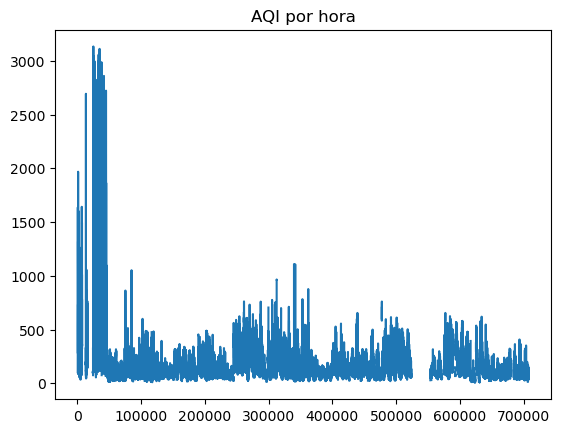

In [21]:
ciudad_hora.info()
ciudad_hora['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: title={'center': 'AQI por hora'}>

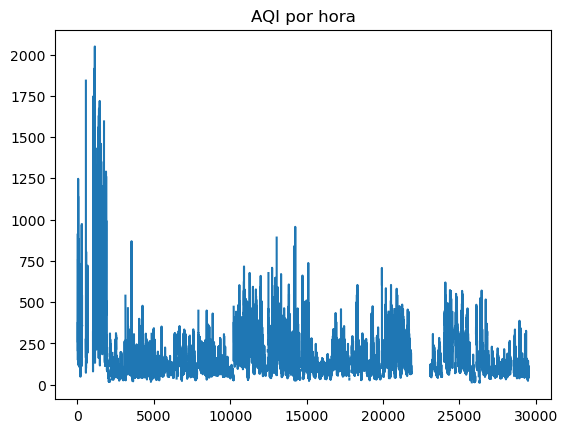

In [22]:
ciudad_dia.info()
ciudad_dia['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


<Axes: title={'center': 'AQI por hora'}>

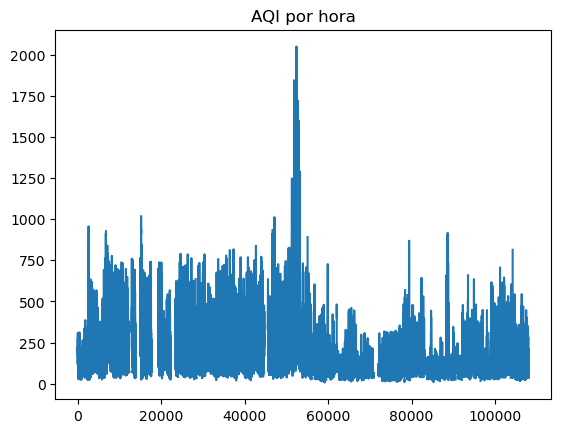

In [23]:
estacion_hora.info()
estacion_hora['AQI'].plot(title = "AQI por hora")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


<Axes: title={'center': 'AQI por hora'}>

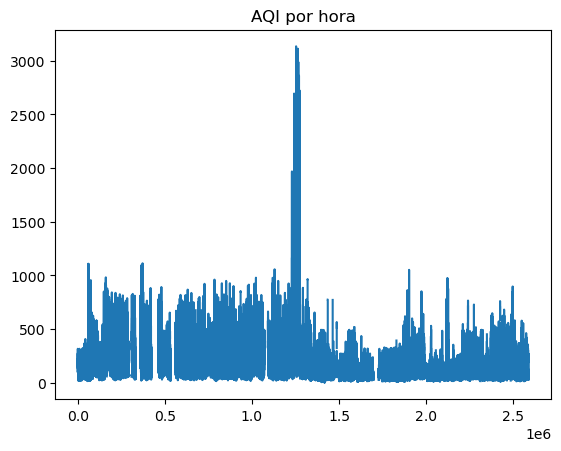

In [24]:
estacion_dia.info()
estacion_dia['AQI'].plot(title = "AQI por hora")

In [25]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


<h2 style="text-align: left; color: red;">Distribución de los contaminantes pre-imputación/limpieza</h2>

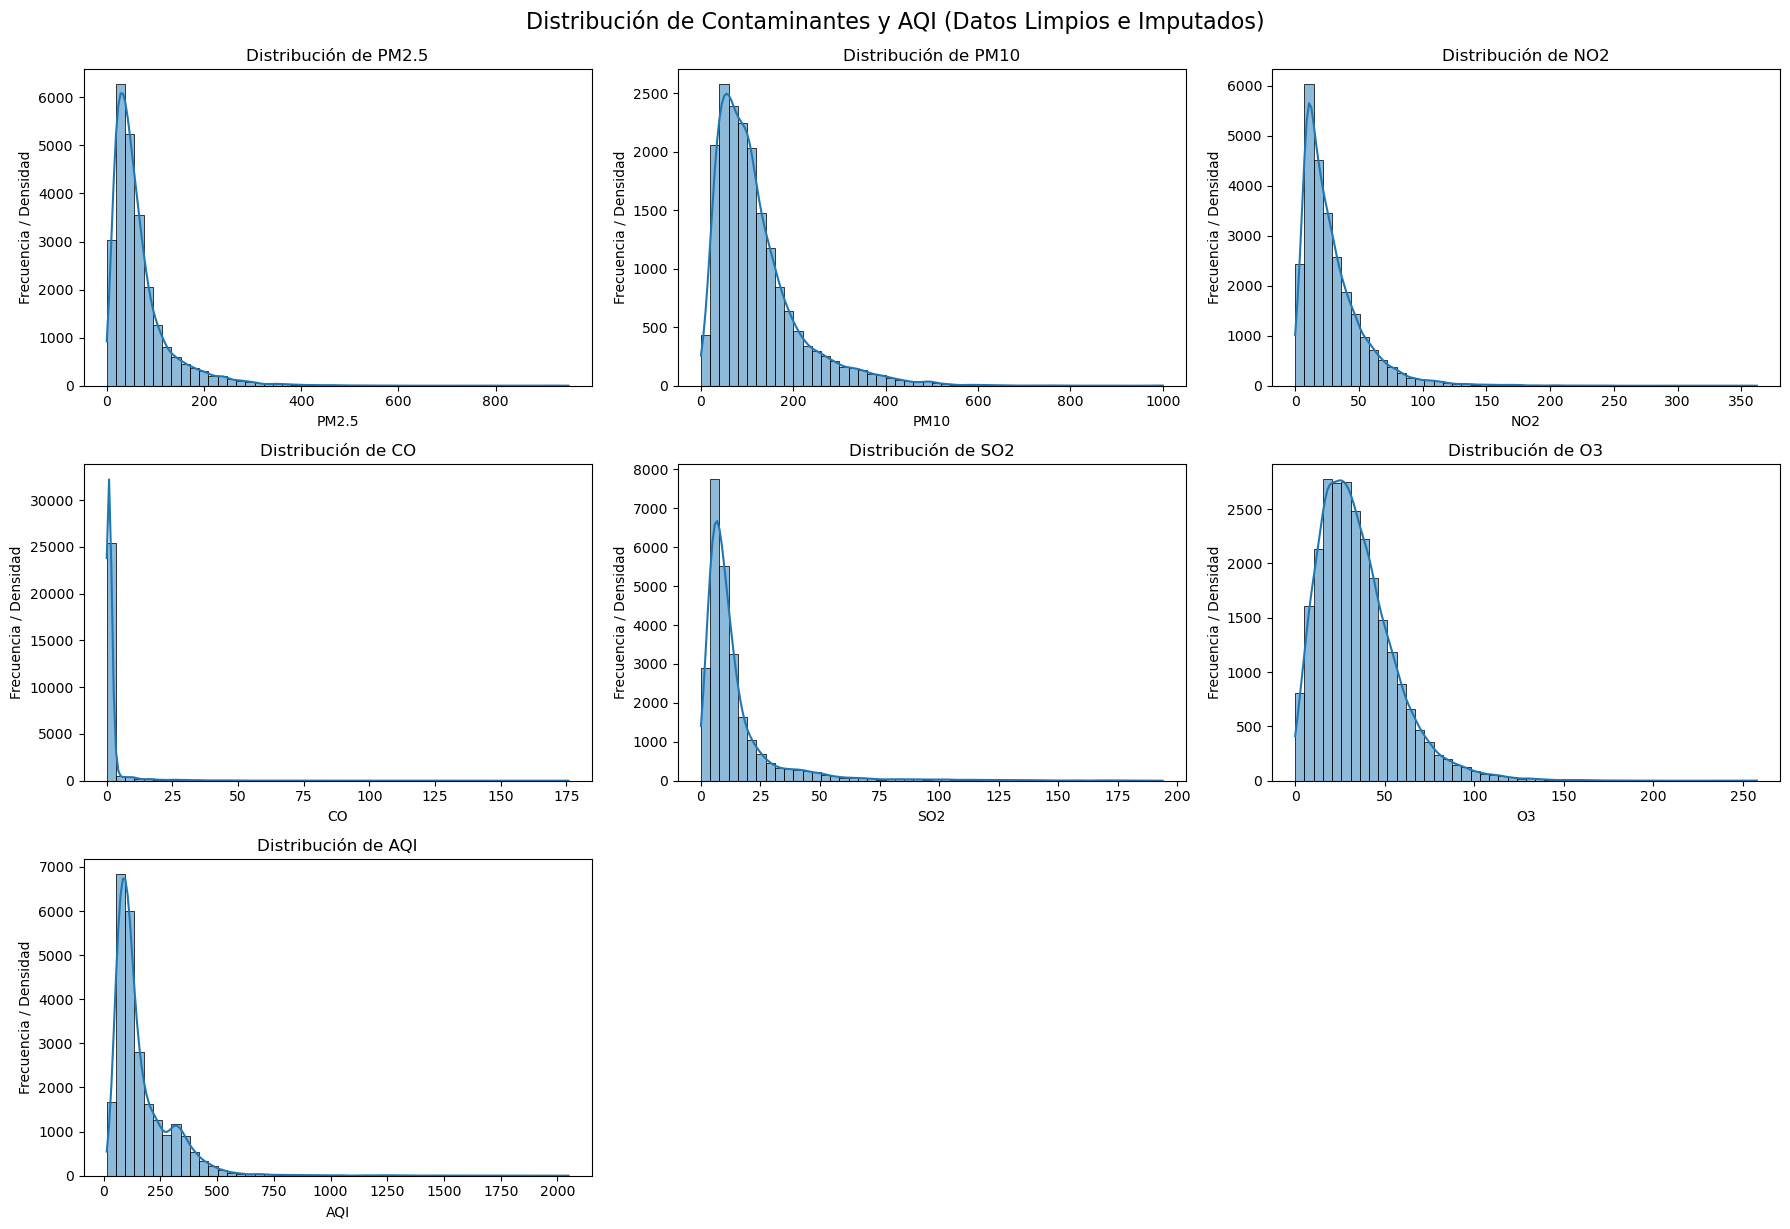

In [26]:
# Variables de contaminantes elegidos.
variables = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

# Creacion del grafico de distribución de los contaminantes.
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(
        data=ciudad_dia,
        x=var,
        kde=True,
        bins=50
    )
    
    plt.xlabel(var)
    plt.ylabel('Frecuencia / Densidad')
    plt.title(f'Distribución de {var}')

plt.tight_layout()
plt.suptitle('Distribución de Contaminantes y AQI (Datos Limpios e Imputados)', fontsize=16, y=1.02)

plt.show()

<h2 style="text-align: left; color: red;">Análisis de NaNs</h2>

In [27]:
def analizar_nans_por_columna_y_total(nombre_archivo_csv):
    """
    Carga el archivo CSV para buscar en las filas si algunos de los contaminantes o el AQI,
    poseen valores nulos y determinar el total encontrado. 
    
    Parametros:
    nombre_archivo_csv: str
        Nombre del archivo csv.
    
    Retorna:
    dict:
        Diccionario con los datos de los valores nulos identificados por columna y el total de filas afectadas.
    """
    try:
        df = pd.read_csv(nombre_archivo_csv)
    except FileNotFoundError:
        return f"Error: El archivo '{nombre_archivo_csv}' no fue encontrado."

    columnas_a_verificar = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']
    columnas_existentes = [col for col in columnas_a_verificar if col in df.columns]
    
    if not columnas_existentes:
        return "No se encontraron las columnas de los contaminantes y el AQI."

    total_filas = len(df)
    
    print(f"Análisis de valores nulos en '{nombre_archivo_csv}' ({total_filas} filas totales)")
    print("-" * 43)
    
    nan_counts = df[columnas_existentes].isna().sum()
    nan_percentages = (nan_counts / total_filas) * 100
    
    reporte_df = pd.DataFrame({
        'Total de NaNs': nan_counts,
        'Porcentaje de NaNs (%)': nan_percentages
    })
    
    reporte_df = reporte_df.sort_values(by='Porcentaje de NaNs (%)', ascending=False)
    reporte_df['Porcentaje de NaNs (%)'] = reporte_df['Porcentaje de NaNs (%)'].map('{:.2f}%'.format)
    
    print("--- Información por Columna ---")
    print(reporte_df)
    
    # 2. Análisis del Total de Filas Afectadas
    # .any(axis=1) devuelve True para cada fila que tiene al menos un NaN en las columnas seleccionadas
    filas_con_algun_nan = df[columnas_existentes].isna().any(axis=1)
    total_filas_afectadas = filas_con_algun_nan.sum()
    porcentaje_filas_afectadas = (total_filas_afectadas / total_filas) * 100
    
    print("-" * 52)
    print("--- Resumen ---")
    print(f"Total de filas con al menos un valor nulo: {total_filas_afectadas}")
    print(f"Porcentaje de filas afectadas:      {porcentaje_filas_afectadas:.2f}%")
    print("-" * 52)
    
    return {
        'desglose_por_columna': reporte_df,
        'total_filas_afectadas': total_filas_afectadas,
        'porcentaje_filas_afectadas': porcentaje_filas_afectadas
    }


resultados_analisis = analizar_nans_por_columna_y_total("Archivos No Imputados/city_day.csv")

Análisis de valores nulos en 'Archivos No Imputados/city_day.csv' (29531 filas totales)
-------------------------------------------
--- Información por Columna ---
       Total de NaNs Porcentaje de NaNs (%)
PM10           11140                 37.72%
NH3            10328                 34.97%
AQI             4681                 15.85%
PM2.5           4598                 15.57%
O3              4022                 13.62%
SO2             3854                 13.05%
NO2             3585                 12.14%
NO              3582                 12.13%
CO              2059                  6.97%
----------------------------------------------------
--- Resumen ---
Total de filas con al menos un valor nulo: 15186
Porcentaje de filas afectadas:      51.42%
----------------------------------------------------


<h2 style="text-align: left; color: red;">Preprocesamiento de datos</h2>

<h3 style="text-align: left; color: red;">Función con los rangos del AQI</h3>

In [28]:
def obtener_rangos_aqi():
    '''
    Obtiene los rangos de AQI quemados para cada contaminante segun los valores establecidos por la CPCB de la India.
    
    Retorna:
    dict:
        Valores de los rangos del AQI para cada contaminante. 
    '''
    return {'PM2.5':[(0,30,0,50),(31,60,51,100),(61,90,101,200),(91,120,201,300),(121,250,301,400),(251,500,401,500)],
            'PM10':[(0,50,0,50),(51,100,51,100),(101,250,101,200),(251,350,201,300),(351,430,301,400),(431,1000,401,500)],
            'NO2':[(0,40,0,50),(41,80,51,100),(81,180,101,200),(181,280,201,300),(281,400,301,400),(401,1000,401,500)],
            'O3':[(0,50,0,50),(51,100,51,100),(101,168,101,200),(169,208,201,300),(209,748,301,400),(749,1500,401,500)],
            'CO':[(0,1.0,0,50),(1.1,2.0,51,100),(2.1,10.0,101,200),(10.1,17.0,201,300),(17.1,34.0,301,400),(34.1,100,401,500)],
            'SO2':[(0,40,0,50),(41,80,51,100),(81,380,101,200),(381,800,201,300),(801,1600,301,400),(1601,3200,401,500)],
            'NH3':[(0,200,0,50),(201,400,51,100),(401,800,101,200),(801,1200,201,300),(1201,1800,301,400),(1801,3600,401,500)]}

<h3 style="text-align: left; color: red;">Función para el calculo del subíndice del AQI</h3>

In [29]:
def calcular_subindice_aqi(concentracion, nombre_contaminante, rangos):
    '''
    Calcula el subíndice del AQI para la concentracion de un contaminante.
    
    Parametros:
    concentracion: float
        Valor de la concentración del contaminante
    nombre_contaminante: str
        Nombre del contaminante
    rangos: dict
        Diccionario con los rangos de contaminante del AQI.
    
    Retorna:
    limite_inf_aqi: float 
        Subíndice calculado del AQI.
    np.nan:
        Si no se logro calcular el AQI.
    '''
    if nombre_contaminante not in rangos or pd.isna(concentracion): 
        return np.nan
    for limite_inf_conc, limite_sup_conc, limite_inf_aqi, limite_sup_aqi in rangos[nombre_contaminante]:
        if limite_inf_conc <= concentracion <= limite_sup_conc:
            if limite_sup_conc == limite_inf_conc: 
                return limite_inf_aqi
            return ((limite_sup_aqi-limite_inf_aqi)/(limite_sup_conc-limite_inf_conc))*(concentracion-limite_inf_conc)+limite_inf_aqi
    ultimo_rango = rangos[nombre_contaminante][-1]
    if concentracion > ultimo_rango[1]: 
        return float(ultimo_rango[3])
    return np.nan


<h3 style="text-align: left; color: red;">Función para calcular el AQI</h3>

In [30]:

def calcular_aqi_final(fila, columnas_df, rangos_aqi):
    '''
    Calcula el valor del AQI para cada fila de valores con los subindices obtenidos.
    
    Parametros:
    fila: dataframe
        Fila del DataFrame a calcular el AQI.
    columnas_df: Index
        Columnas de los valores a evaluar.
    rangos_aqi: dict
        Rangos del AQI para cada contaminante.

    Retorna:
    max(subindices): float
        Valor mas alto de los subíndices calculados.
    np.nan:
        Si no se logro calcular el AQI retorna nulo.
    '''
    subindices = [calcular_subindice_aqi(fila.get(contaminante), contaminante, rangos_aqi) for contaminante in rangos_aqi if contaminante in columnas_df]
    subindices = [s for s in subindices if not pd.isna(s)]
    hay_particulado = not (pd.isna(fila.get('PM2.5',np.nan)) and pd.isna(fila.get('PM10',np.nan)))
    if len(subindices) >= 3 and hay_particulado: 
        return max(subindices)
    return np.nan


<h3 style="text-align: left; color: red;">Función para cargar los archivos y iniciar el calculo del AQI</h3>

In [31]:

def cargar_y_crear_valor_real(ruta_archivo, rangos):
    '''
    Carga los datos almacenado en el csv y llama a las funciones que calculan el AQI.
    
    Parametros:
    ruta_archivo: str
        Ruta al archivo CSV.
    rangos: dict
        Rangos de AQI para cada contaminante.

    Retorna:
    datos: pd.DataFrame
        Archivo con el AQI calculado mediantes los indices.
    '''
    print("--- 1. Cargando datos y creando 'Valor Real' ---")
    inicio_tiempo = time.time()
    
    datos = pd.read_csv(ruta_archivo)
    datos['Date'] = pd.to_datetime(datos['Date'], errors='coerce')
    datos = datos.sort_values(by=['Date','City']).reset_index(drop=True)
    datos['AQI_Calculado'] = datos.apply(lambda fila: calcular_aqi_final(fila, datos.columns, rangos), axis=1)
    
    filas_iniciales = len(datos)
    datos.dropna(subset=['AQI_Calculado'], inplace=True)
    print(f"Se eliminaron {filas_iniciales-len(datos)} filas sin un AQI válido.")
    datos.rename(columns={'AQI_Calculado': 'AQI'}, inplace=True)
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return datos


<h3 style="text-align: left; color: red;">Función para dividir los datos de forma cronológica</h3>

In [32]:

def dividir_datos_cronologicamente(datos):
    '''
    Divide los datos de forma cronologica separando los datos en un 80% para el  entrenamiento y un 20% para las pruebas.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame con los datos del AQI calculado.

    Retorna:
    datos_entrenamiento: pd.DataFrame
        DataFrame con el 80% de los datos para el entrenamiento.
    datos_prueba: pd.DataFrame
        DataFrame con el 20% de los datos para las pruebas.
    '''
    print("\n--- 2. Dividiendo datos (80/20 cronológico) ---")
    inicio_tiempo = time.time()
    
    datos_entrenamiento, datos_prueba = train_test_split(datos, test_size=0.2, shuffle=False)
    print(f"División: {len(datos_entrenamiento)} entrenamiento, {len(datos_prueba)} prueba.")
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return datos_entrenamiento, datos_prueba


<h3 style="text-align: left; color: red;">Función para separar las variables independientes del AQI</h3>

In [33]:

def separar_caracteristicas_y_objetivo(datos_entrenamiento, datos_prueba, caracteristicas, objetivo):
    '''
    Separa los variables independientes X y dependientes y, de los datos de entrenamiento y prueba.
    
    Parametros:
    datos_entrenamiento: pd.DataFrame
        DataFrame con el 80% de los datos para el entrenamiento.
    datos_prueba: pd.DataFrame
        DataFrame con el 20% de los datos para las pruebas.
    caracteristicas: list
        Lista de las variables independientes de los contaminantes.
    objetivo: str
        Columna de la variable dependiente.

    Retorna:
    X_entrenamiento: pd.DataFrame
        DataFrame con las variables independientes del entrenamiento.
    y_entrenamiento: pd.Series
        Serie con la variable dependiente del entrenamiento.
    X_prueba: pd.DataFrame
        DataFrame con las variables independientes de la prueba.    
    y_prueba: pd.Series
        Serie con la variable dependiente de la prueba.
    '''
    print("\n--- 3. Separando Características (X) y Objetivo (y) ---")
    inicio_tiempo = time.time()
    
    X_entrenamiento = datos_entrenamiento[caracteristicas]
    y_entrenamiento = datos_entrenamiento[objetivo]
    X_prueba = datos_prueba[caracteristicas]
    y_prueba = datos_prueba[objetivo]
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s.")
    return X_entrenamiento, y_entrenamiento, X_prueba, y_prueba


<h3 style="text-align: left; color: red;">Función para visualizar los valores NaN</h3>

In [34]:

def visualizar_valores_nan(datos, titulo, variables_principales):
    '''
    Grafica para visualizar la cantidad de valores NaN que existen por columna en las variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    titulo: str
        Título del gráfico
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print(f"\n--- Análisis de valores NaN: {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_a_analizar = [col for col in variables_principales if col in datos.columns]
    
    valores_nulos = datos[columnas_a_analizar].isnull().sum()
    valores_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)
    
    if valores_nulos.empty:
        print("No existen valores NaN en las variables principales.")
        return
    
    print(valores_nulos)
    plt.figure(figsize=(12, 6))
    valores_nulos.plot(kind='bar', color=sns.color_palette('viridis', len(valores_nulos)))
    plt.title(f'Valores NaN por Columna ({titulo})', fontsize=16)
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de NaN')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar las tendencias temporales</h3>

In [35]:

def visualizar_tendencias_temporales(datos, variables_principales):
    '''
    Grafica para visualizar las tendencias temporales con un promedio mensual en las variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print("\n--- Visualizando Tendencias Temporales (Promedio Mensual) ---")
    inicio_tiempo = time.time()
    
    columnas_visualizar = []
    
    if 'AQI' in datos.columns:
        columnas_visualizar.append('AQI')
    
    for col in variables_principales:
        if col in datos.columns:
            columnas_visualizar.append(col)
    
    datos_temp = datos[['Date'] + columnas_visualizar].copy()
    datos_mensuales = datos_temp.set_index('Date').resample('M').mean()
    
    n_vars = len(columnas_visualizar)
    fig, axes = plt.subplots(n_vars, 1, figsize=(20, 4*n_vars), sharex=True)
    
    if n_vars == 1:
        axes = [axes]
    
    unidades = {
        'AQI': 'Índice AQI',
        'PM2.5': 'µg/m³',
        'PM10': 'µg/m³',
        'NO': 'µg/m³',
        'NO2': 'µg/m³',
        'NH3': 'µg/m³',
        'CO': 'mg/m³',
        'SO2': 'µg/m³',
        'O3': 'µg/m³'
    }
    
    for i, columna in enumerate(columnas_visualizar):
        axes[i].plot(datos_mensuales.index, datos_mensuales[columna], 
                    linewidth=2, color='steelblue')
        axes[i].set_title(f'Tendencia Temporal: {columna}', fontsize=14, fontweight='bold')
        
        unidad = unidades.get(columna, 'Concentración')
        axes[i].set_ylabel(f'{columna}\n({unidad})', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        
        axes[i].tick_params(axis='y', labelsize=10)
        axes[i].tick_params(axis='x', labelsize=10)
    
    axes[-1].set_xlabel('Fecha', fontsize=12, fontweight='bold')
    
    plt.suptitle('Tendencias Temporales (Promedio Mensual)', fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los datos antes de detectar los valores atípicos</h3>

In [36]:

def visualizar_datos_antes_deteccion_atipicos(datos, columna_x, columna_y, titulo):
    '''
    Gráfica para visualizar los datos antes de detectar los valores de atípicos.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    columna_x: str
        Nombre de la columna para el eje X
    columna_y: str
        Nombre de la columna para el eje Y
    titulo: str
        Título del gráfico

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=datos, x=columna_x, y=columna_y, alpha=0.7, color='royalblue')
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.xlabel(f'{columna_x} (µg/m³)', fontsize=12, fontweight='bold')
    plt.ylabel(f'{columna_y} (µg/m³)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los datos despues de detectar los valores atípicos</h3>

In [37]:

def visualizar_datos_despues_deteccion_atipicos(datos, columna_x, columna_y, etiquetas, titulo):
    '''
    Grafica para visualizar los datos después de detectar los valores atípicos.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    columna_x: str
        Nombre de la columna para el eje X
    columna_y: str
        Nombre de la columna para el eje Y
    etiquetas: array
        Etiquetas para diferenciar valores atípicos (-1) de los normales (1)    
    titulo: str
        Título del gráfico
    
    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    datos_grafico = datos.copy()
    datos_grafico['Tipo'] = ['Atípico' if etiqueta == -1 else 'Normal' for etiqueta in etiquetas]
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=datos_grafico, x=columna_x, y=columna_y, hue='Tipo', style='Tipo', 
                    palette={'Normal':'royalblue', 'Atípico':'orangered'}, alpha=0.7)
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.xlabel(f'{columna_x} (µg/m³)', fontsize=12, fontweight='bold')
    plt.ylabel(f'{columna_y} (µg/m³)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Clasificación', title_fontsize=12, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar los el mapa de calor de correlación</h3>

In [38]:

def visualizar_mapa_correlaciones(datos, titulo, variables_principales):
    '''
    Gráfica para visualizar el mapa de calor de correlacion entre variables principales.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    titulo: str
        Título del gráfico
    variables_principales: list
        Lista de variables principales a analizar

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_disponibles = [col for col in variables_principales if col in datos.columns]
    
    if len(columnas_disponibles) < 2:
        print("No existen suficientes variables principales para crear el mapa de correlaciones.")
        return
    
    matriz_correlacion = datos[columnas_disponibles].corr()
    
    plt.figure(figsize=(12, 10))
    mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)
    
    sns.heatmap(matriz_correlacion, mask=mascara, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f',
                vmin=-1, vmax=1)
    plt.title(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h3 style="text-align: left; color: red;">Función para visualizar la relación de las variables con el AQI</h3>

In [39]:

def visualizar_relacion_variables_con_aqi(datos, variables_principales, columna_objetivo, titulo):
    '''
    Gráfica para visualizar las relaciones entre las variables principales y AQI con gráficos de dispersión.
    
    Parametros:
    datos: pd.DataFrame
        DataFrame a analizar
    variables_principales: list
        Lista de variables principales a analizar
    columna_objetivo: str
        Nombre de la columna objetivo
    titulo: str
        Título de la gráfica

    Retorna:
    None
    '''
    print(f"\n--- {titulo} ---")
    inicio_tiempo = time.time()
    
    columnas_disponibles = [col for col in variables_principales if col in datos.columns and datos[col].dtype in ['int64', 'float64']]
    
    if not columnas_disponibles:
        print("No se encontraron variables principales numéricas para visualizar.")
        return
    
    numero_columnas = 3
    numero_filas = (len(columnas_disponibles) + numero_columnas - 1) // numero_columnas
    
    fig, axes = plt.subplots(numero_filas, numero_columnas, figsize=(18, 6*numero_filas))
    if numero_filas == 1:
        axes = axes.reshape(1, -1)
    
    unidades = {
        'PM2.5': 'µg/m³', 'PM10': 'µg/m³', 'NO': 'µg/m³', 'NO2': 'µg/m³',
        'NH3': 'µg/m³', 'CO': 'mg/m³', 'SO2': 'µg/m³', 'O3': 'µg/m³', 'AQI':'µg/m³'
    }
    
    for i, columna in enumerate(columnas_disponibles):
        fila = i // numero_columnas
        columna_idx = i % numero_columnas
        
        if numero_filas > 1:
            eje = axes[fila, columna_idx]
        else:
            eje = axes[columna_idx]
            
        sns.scatterplot(data=datos, x=columna, y=columna_objetivo, alpha=0.6, ax=eje, color='steelblue')
        eje.set_title(f'{columna} vs {columna_objetivo}', fontsize=12, fontweight='bold')
        
        unidad_x = unidades.get(columna, 'Concentración')
        eje.set_xlabel(f'{columna} ({unidad_x})', fontsize=10, fontweight='bold')
        eje.set_ylabel(f'{columna_objetivo} (Índice)', fontsize=10, fontweight='bold')
        eje.grid(True, alpha=0.3)
    
    for i in range(len(columnas_disponibles), numero_filas * numero_columnas):
        fila = i // numero_columnas
        columna_idx = i % numero_columnas
        if numero_filas > 1:
            axes[fila, columna_idx].set_visible(False)
        else:
            axes[columna_idx].set_visible(False)
    
    plt.suptitle(titulo, fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de visualización: {tiempo_transcurrido:.2f}s.")


<h2 style="text-align: left; color: red;">Funciones de Preprocesamiento</h2>

<h3 style="text-align: left; color: red;">Función para adaptar el formato de las variables</h3>

In [40]:

def codificar_y_crear_caracteristicas_temporales(X_entrenamiento, X_prueba):
    '''
    Codifica la columna 'City', para permitir su utilizacion en los modelos y crea las características temporales de la columna 'Date'.
    
    Parametros:
    X_entrenamiento: pd.DataFrame
        Datos del dataframe de entrenamiento
    X_prueba: pd.DataFrame
        Datos del dataframe de prueba

    Retorna:
    X_entrenamiento_procesado: pd.DataFrame
        DataFrame de entrenamiento con las características codificadas y las variables temporales.
    X_prueba_procesado: pd.DataFrame
        DataFrame de prueba con las características codificadas y las variables temporales temporales.
    codificador: OrdinalEncoder
        Codificador utilizado para transformar la columna 'City'.
    '''
    print("\n--- 4.1. Codificación y obtencion de variables temporales ---")
    inicio_tiempo = time.time()
    
    entrenamiento_procesado = X_entrenamiento.copy()
    prueba_procesado = X_prueba.copy()
    
    codificador = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    entrenamiento_procesado['City_encoded'] = codificador.fit_transform(entrenamiento_procesado[['City']])
    prueba_procesado['City_encoded'] = codificador.transform(prueba_procesado[['City']])
    
    for datos in [entrenamiento_procesado, prueba_procesado]:
        datos['dayofweek'] = datos['Date'].dt.dayofweek
        datos['dayofyear'] = datos['Date'].dt.dayofyear
        datos['month'] = datos['Date'].dt.month
        datos['year'] = datos['Date'].dt.year
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")
    return entrenamiento_procesado, prueba_procesado, codificador


<h3 style="text-align: left; color: red;">Función para identificar y eliminar los valores atípicos</h3>

In [41]:

def identificar_y_eliminar_valores_atipicos(X_entrenamiento, columnas_analisis, mostrar_graficos=True):
    '''
    Se identifican los valores atípicos en los datos de entrenamiento con Isolation Forest y se eliminan.
    
    Parametros:
    X_entrenamiento: pd.DataFrame
        Datos del dataframe de entrenamiento
    columnas_analisis: list
        Columnas para el análisis de los valores atípicos
    mostrar_graficos: bool
        Condicion para mostrar las visualizaciones de los datos

    Retorna:
    X_entrenamiento_limpio: pd.DataFrame
        DataFrame para el entrenamiento sin los valores atípicos.
    indices_datos_limpios: pd.Index
        Índices de los datos que no son atípicos.
    '''
    print("\n--- 4.2. Limpieza de valores atípicos (entrenamiento) ---")
    inicio_tiempo = time.time()
    
    if mostrar_graficos:
        visualizar_datos_antes_deteccion_atipicos(X_entrenamiento, 'PM2.5', 'PM10', 
                                                 'Datos Antes de Detección de Atípicos')
    
    imputador_temporal = SimpleImputer(strategy='median')
    datos_para_isolation = imputador_temporal.fit_transform(X_entrenamiento[columnas_analisis])
    
    isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42, n_jobs=-1)
    etiquetas = isolation_forest.fit_predict(datos_para_isolation)
    
    if mostrar_graficos:
        visualizar_datos_despues_deteccion_atipicos(X_entrenamiento, 'PM2.5', 'PM10', etiquetas, 
                                                   'Identificación de Atípicos')
    
    indices_datos_limpios = X_entrenamiento.index[etiquetas == 1]
    X_entrenamiento_limpio = X_entrenamiento.loc[indices_datos_limpios].copy()
    
    print(f"   Reducción de {len(X_entrenamiento)} a {len(X_entrenamiento_limpio)} filas.")
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")
    return X_entrenamiento_limpio, indices_datos_limpios


<h3 style="text-align: left; color: red;">Función para imputar los valores faltantes</h3>

In [42]:

def imputar_valores_faltantes(X_entrenamiento_limpio, X_prueba, columnas_imputar, mostrar_graficos=True):
    '''
    Se imputan los valores faltantes usando el IterativeImputer con el método de LightGBM.
    
    Parametros:
    X_entrenamiento_limpio: pd.DataFrame
        Datos del dataframe de entrenamiento sin los valores atípicos
    X_prueba: pd.DataFrame
        Datos del dataframe de prueba
    columnas_imputar: list
        Columnas a las que se aplicara la imputación
    mostrar_graficos: bool
        Condición para mostrar las visualizaciones de los datos

    Retorna:
    datos_entrenamiento_imputados: pd.DataFrame
        DataFrame de entrenamiento con los valores imputados.
    datos_prueba_imputados: pd.DataFrame
        DataFrame de prueba con los valores imputados.
    imputador: IterativeImputer
        El imputador utilizado para rellenar los valores faltantes.
    '''
    print("\n--- 4.3. Imputación con IterativeImputer ---")
    inicio_tiempo = time.time()
    
    modelo_lgbm_imputacion = lgbm.LGBMRegressor(random_state=42, verbose=-1, n_jobs=-1)
    imputador = IterativeImputer(estimator=modelo_lgbm_imputacion, max_iter=5, random_state=42, verbose=0)
    
    array_entrenamiento = imputador.fit_transform(X_entrenamiento_limpio[columnas_imputar])
    array_prueba = imputador.transform(X_prueba[columnas_imputar])
    
    datos_entrenamiento_imputados = pd.DataFrame(array_entrenamiento, columns=columnas_imputar, 
                                                index=X_entrenamiento_limpio.index)
    datos_prueba_imputados = pd.DataFrame(array_prueba, columns=columnas_imputar, index=X_prueba.index)
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")
    
    return datos_entrenamiento_imputados, datos_prueba_imputados, imputador


<h3 style="text-align: left; color: red;">Función para convertir los valores a una escala logarítmica</h3>

In [43]:

def aplicar_transformacion_logaritmica(y_entrenamiento, y_prueba):
    '''
    Transforma las variables dependientes del entrenamiento y la prueba (AQI), usando una escala logarítmica.
    
    Parametros:
    Y_entrenamiento: pd.Series
        Variable dependiente del entrenamiento (AQI)
    Y_prueba: pd.Series
        Variable dependiente de la prueba (AQI)

    Retorna:
    y_entrenamiento_log: pd.Series
        Variable dependiente del entrenamiento en escala logarítmica.
    y_prueba_log: pd.Series
        Variable dependiente de la prueba en escala logarítmica.
    '''
    print("\n--- 5. Aplicando transformación logarítmica al objetivo (AQI) ---")
    inicio_tiempo = time.time()
    
    if isinstance(y_entrenamiento, pd.DataFrame):
        y_entrenamiento = y_entrenamiento.iloc[:, 0]
    if isinstance(y_prueba, pd.DataFrame):
        y_prueba = y_prueba.iloc[:, 0]
    
    y_entrenamiento_log = np.log1p(y_entrenamiento)
    y_prueba_log = np.log1p(y_prueba)
    
    if isinstance(y_entrenamiento_log, np.ndarray):
        y_entrenamiento_log = pd.Series(y_entrenamiento_log, index=y_entrenamiento.index)
    if isinstance(y_prueba_log, np.ndarray):
        y_prueba_log = pd.Series(y_prueba_log, index=y_prueba.index)
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")
    return y_entrenamiento_log, y_prueba_log


<h3 style="text-align: left; color: red;">Función para recombinar las variable independientes con el AQI</h3>

In [44]:

def recombinar_datos_procesados(X_procesado, y_logaritmico, nombre_columna_objetivo):
    '''
    Combina los valores de las columnas independientes procesadas con la variable dependiente (AQI).
    
    Parametros:
    X_procesado: pd.DataFrame
        Variables independientes procesadas (X) del entrenamiento o prueba.
    y_logaritmico: pd.Series
        Variable dependiente (AQI) transformada a escala logarítmica.
    
    Retorna:
    dataframe_final: pd.DataFrame
        DataFrame final con los datos independientes y dependientes.
    '''
    datos_finales = X_procesado.copy()
    datos_finales[nombre_columna_objetivo] = y_logaritmico
    return datos_finales


<h3 style="text-align: left; color: red;">Función para guardar los artefactos del procesamiento y el dataframe</h3>

In [45]:

def guardar_artefactos_y_datos(codificador, imputador, datos_entrenamiento, datos_prueba):
    '''
    Se guardan los artefacros resultantes del procesamiento y el dataframe obtenido en archivos.
    
    Parametros:
    codificador: OrdinalEncoder
        Codificador usado para la columna 'City'.
    imputador: IterativeImputer
        Imputador usado para rellenar los valores faltantes.
    datos_entrenamiento: pd.DataFrame
        DataFrame del entrenamiento con los datos procesados.
    datos_prueba: pd.DataFrame
        DataFrame de la prueba con los datos procesados.
    
    Retorna:
    None
    '''
    print("\n--- 7. Guardando artefactos y datos finales ---")
    inicio_tiempo = time.time()
    
    joblib.dump(codificador, 'codificador_ordinal_ciudad.joblib')
    joblib.dump(imputador, 'imputador_iterativo.joblib')
    datos_entrenamiento.to_csv("entrenamiento_final.csv", index=False)
    datos_prueba.to_csv("prueba_final.csv", index=False)
    print("Se han guardado los archivoss.")
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")


<h3 style="text-align: left; color: red;">Función para preparar los datos del modelo</h3>

In [46]:

def preparar_datos_para_modelo(datos_entrenamiento, datos_prueba, columna_objetivo):
    '''
    Prepara los datos de entrenamiento y prueba separando las variables independientes (X) y la variable dependiente del AQI (y).
    
    Parametros:
    datos_entrenamiento (pandas.DataFrame): 
        DataFrame con los datos de entrenamiento.
    datos_prueba (pandas.DataFrame): 
        DataFrame con los datos de prueba.
    columna_objetivo (str):
        Nombre de la columna que contiene el AQI.

    Retorna:
    X_entrenamiento: pandas.DataFrame
        DataFrame con las variables independientes del entrenamiento.
    y_entrenamiento: pandas.Series
        Serie con la variable dependiente del entrenamiento (AQI).
    '''
    print("\n--- Preparando datos para el entrenamiento ---")
    inicio_tiempo = time.time()
    
    X_entrenamiento = datos_entrenamiento.drop(columna_objetivo, axis=1)
    y_entrenamiento = datos_entrenamiento[columna_objetivo]
    X_prueba = datos_prueba.drop(columna_objetivo, axis=1)
    y_prueba = datos_prueba[columna_objetivo]
    
    print(f"Formas de: X_train={X_entrenamiento.shape}, X_test={X_prueba.shape}")
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")
    return X_entrenamiento, y_entrenamiento, X_prueba, y_prueba


<h3 style="text-align: left; color: red;">Función para entrenar el modelo con LigthGBM</h3>

In [47]:

def entrenar_modelo_lightgbm(X_entrenamiento, y_entrenamiento, X_prueba, y_prueba):
    '''
    Entrena modelo LightGBM con validación temprana.
    
    Parametros:
    X_entrenamiento: pd.DataFrame
        Variables independientes del dataframe de entrenamiento.
    y_entrenamiento: pd.Series
        Variable dependiente del dataframe de entrenamiento (AQI).
    X_prueba: pd.DataFrame
        Variables independientes del dataframe de prueba.
    y_prueba: pd.Series
        Variable dependiente del dataframe de prueba (AQI).

    Retorna:
    lgbm.LGBMRegressor: 
        El modelo de LightGBM ya entrenado.
    '''
    print("\n--- Entrenando el modelo LightGBM ---")
    inicio_tiempo = time.time()
    
    modelo = lgbm.LGBMRegressor(
        objective='regression_l1', 
        n_estimators=1000, 
        learning_rate=0.05, 
        num_leaves=31, 
        random_state=42, 
        n_jobs=-1, 
        colsample_bytree=0.8, 
        subsample=0.8
    )
    
    modelo.fit(X_entrenamiento, y_entrenamiento, 
              eval_set=[(X_prueba, y_prueba)], 
              eval_metric='l1', 
              callbacks=[lgbm.early_stopping(100, verbose=False)])
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de entrenamiento: {tiempo_transcurrido:.2f}s.")
    return modelo


<h3 style="text-align: left; color: red;">Función para evaluar modelo y crear las visualizaciones</h3>

In [48]:

def evaluar_modelo_y_crear_visualizaciones(modelo, X_prueba, y_prueba, datos_originales, ciudad_ejemplo):
    '''
    Evalúa el modelo entrenado y crea las respectivas graficas para visualizar los resultados.
    
    Parametros:
    modelo: lgbm.LGBMRegressor
        Modelo entrenado.
    X_prueba: pd.DataFrame
        Variables independientes del dataframe de prueba.
    y_prueba: pd.Series
        Variable dependiente del dataframe de prueba (AQI).
    datos_originales: pd.DataFrame
        DataFrame original para visualizaciones.
    ciudad_ejemplo: str
        Ciudad elegida para realizar la gráfica.

    Retorna:
    modelo: lgbm.LGBMRegressor
        Modelo entrenado.
    metricas: dict
        Diccionario con las métricas de evaluación (MAE, RMSE, R²).
    valores_reales: pd.Series
        Valores reales del AQI en la prueba.
    valores_predichos: pd.Series
        Valores predichos del AQI por el modelo.
    '''
    print("\n--- Evaluación y Visualización de Resultados ---")
    inicio_tiempo = time.time()
    
    valores_reales = np.expm1(y_prueba)
    valores_predichos = np.expm1(modelo.predict(X_prueba))
    
    datos_resultados = pd.DataFrame({'real': valores_reales, 'pred': valores_predichos}).replace([np.inf,-np.inf],np.nan).dropna()
    mae = mean_absolute_error(datos_resultados['real'], datos_resultados['pred'])
    rmse = np.sqrt(mean_squared_error(datos_resultados['real'], datos_resultados['pred']))
    r2 = r2_score(datos_resultados['real'], datos_resultados['pred'])
    print(f"Métricas (sobre {len(datos_resultados)} filas): MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")
    
    dataframe_grafico = pd.DataFrame({'AQI_Real': valores_reales, 'AQI_Predicho': valores_predichos}, 
                                    index=y_prueba.index).dropna()
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='AQI_Real', y='AQI_Predicho', data=dataframe_grafico, alpha=0.6, color='steelblue')
    valor_maximo = max(dataframe_grafico.max())
    plt.plot([0,valor_maximo],[0,valor_maximo],'r--',lw=2,label='Predicción Perfecta')
    plt.title('AQI Real vs. Predicho', fontsize=16, fontweight='bold')
    plt.xlabel('AQI Real (Índice)', fontsize=12, fontweight='bold')
    plt.ylabel('AQI Predicho (Índice)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    datos_para_grafico = datos_originales.loc[y_prueba.index].join(dataframe_grafico)
    datos_ciudad = datos_para_grafico[datos_para_grafico['City']==ciudad_ejemplo].sort_values('Date')
    if not datos_ciudad.empty:
        plt.figure(figsize=(20, 8))
        plt.plot(datos_ciudad['Date'], datos_ciudad['AQI_Real'], label='AQI Real', 
                marker='o', markersize=4, linewidth=2, color='steelblue')
        plt.plot(datos_ciudad['Date'], datos_ciudad['AQI_Predicho'], label='AQI Predicho', 
                linestyle='--', linewidth=2, color='orangered')
        plt.title(f'Comparación AQI en {ciudad_ejemplo}', fontsize=16, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12, fontweight='bold')
        plt.ylabel('AQI (Índice)', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de evaluación: {tiempo_transcurrido:.2f}s")
    
    return modelo, {'mae':mae, 'rmse':rmse, 'r2':r2}, valores_reales, valores_predichos


<h3 style="text-align: left; color: red;">Función para guardar el modelo y los residuos generados</h3>

In [49]:

def guardar_modelo_final_y_residuos(modelo, valores_reales, valores_predichos):
    '''
    Guarda el modelo final entrenado y los residuos generados en archivos.
    
    Parametros:
    modelo: lgbm.LGBMRegressor
        Modelo entrenado.
    valores_reales: pd.Series
        Valores reales del AQI en la prueba.
    valores_predichos: pd.Series
        Valores predichos del AQI por el modelo.

    Retorna:
    None
    '''
    print("\n--- Guardando modelo final y residuos ---")
    inicio_tiempo = time.time()
    
    joblib.dump(modelo, 'modelo_lgbm_aqi.joblib')
    joblib.dump(valores_reales - valores_predichos, 'residuos.joblib')
    print("Guardado exitoso.")
    
    tiempo_transcurrido = time.time() - inicio_tiempo
    print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")


<h3 style="text-align: left; color: red;">Ejecucion de el procesamiento y modelado</h3>

INICIANDO PIPELINE DE PROCESAMIENTO Y MODELADO DE AQI
--- 1. Cargando datos y creando 'Valor Real' ---
Se eliminaron 3856 filas sin un AQI válido.
Tiempo de ejecución: 1.02s.

--- Análisis de valores NaN: DataFrame Inicial (Antes de Limpieza) ---
PM10     7290
NH3      6797
AQI       895
O3        832
PM2.5     757
SO2       580
CO        438
NO2       380
NO        370
dtype: int64


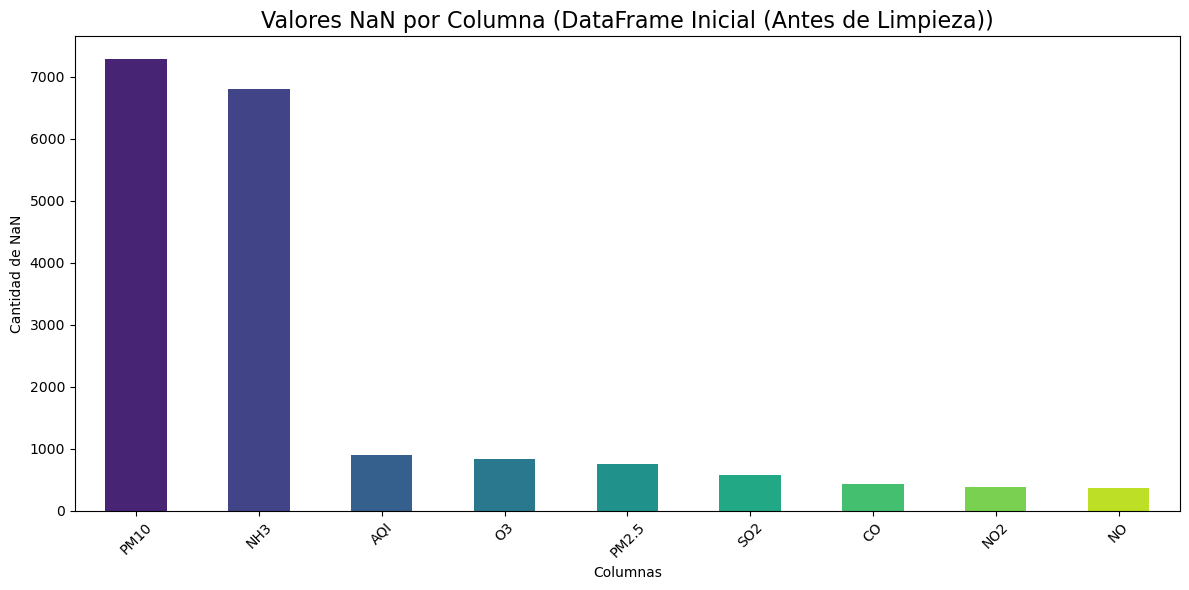

Tiempo de visualización: 0.15s.

--- Visualizando Tendencias Temporales (Promedio Mensual) ---


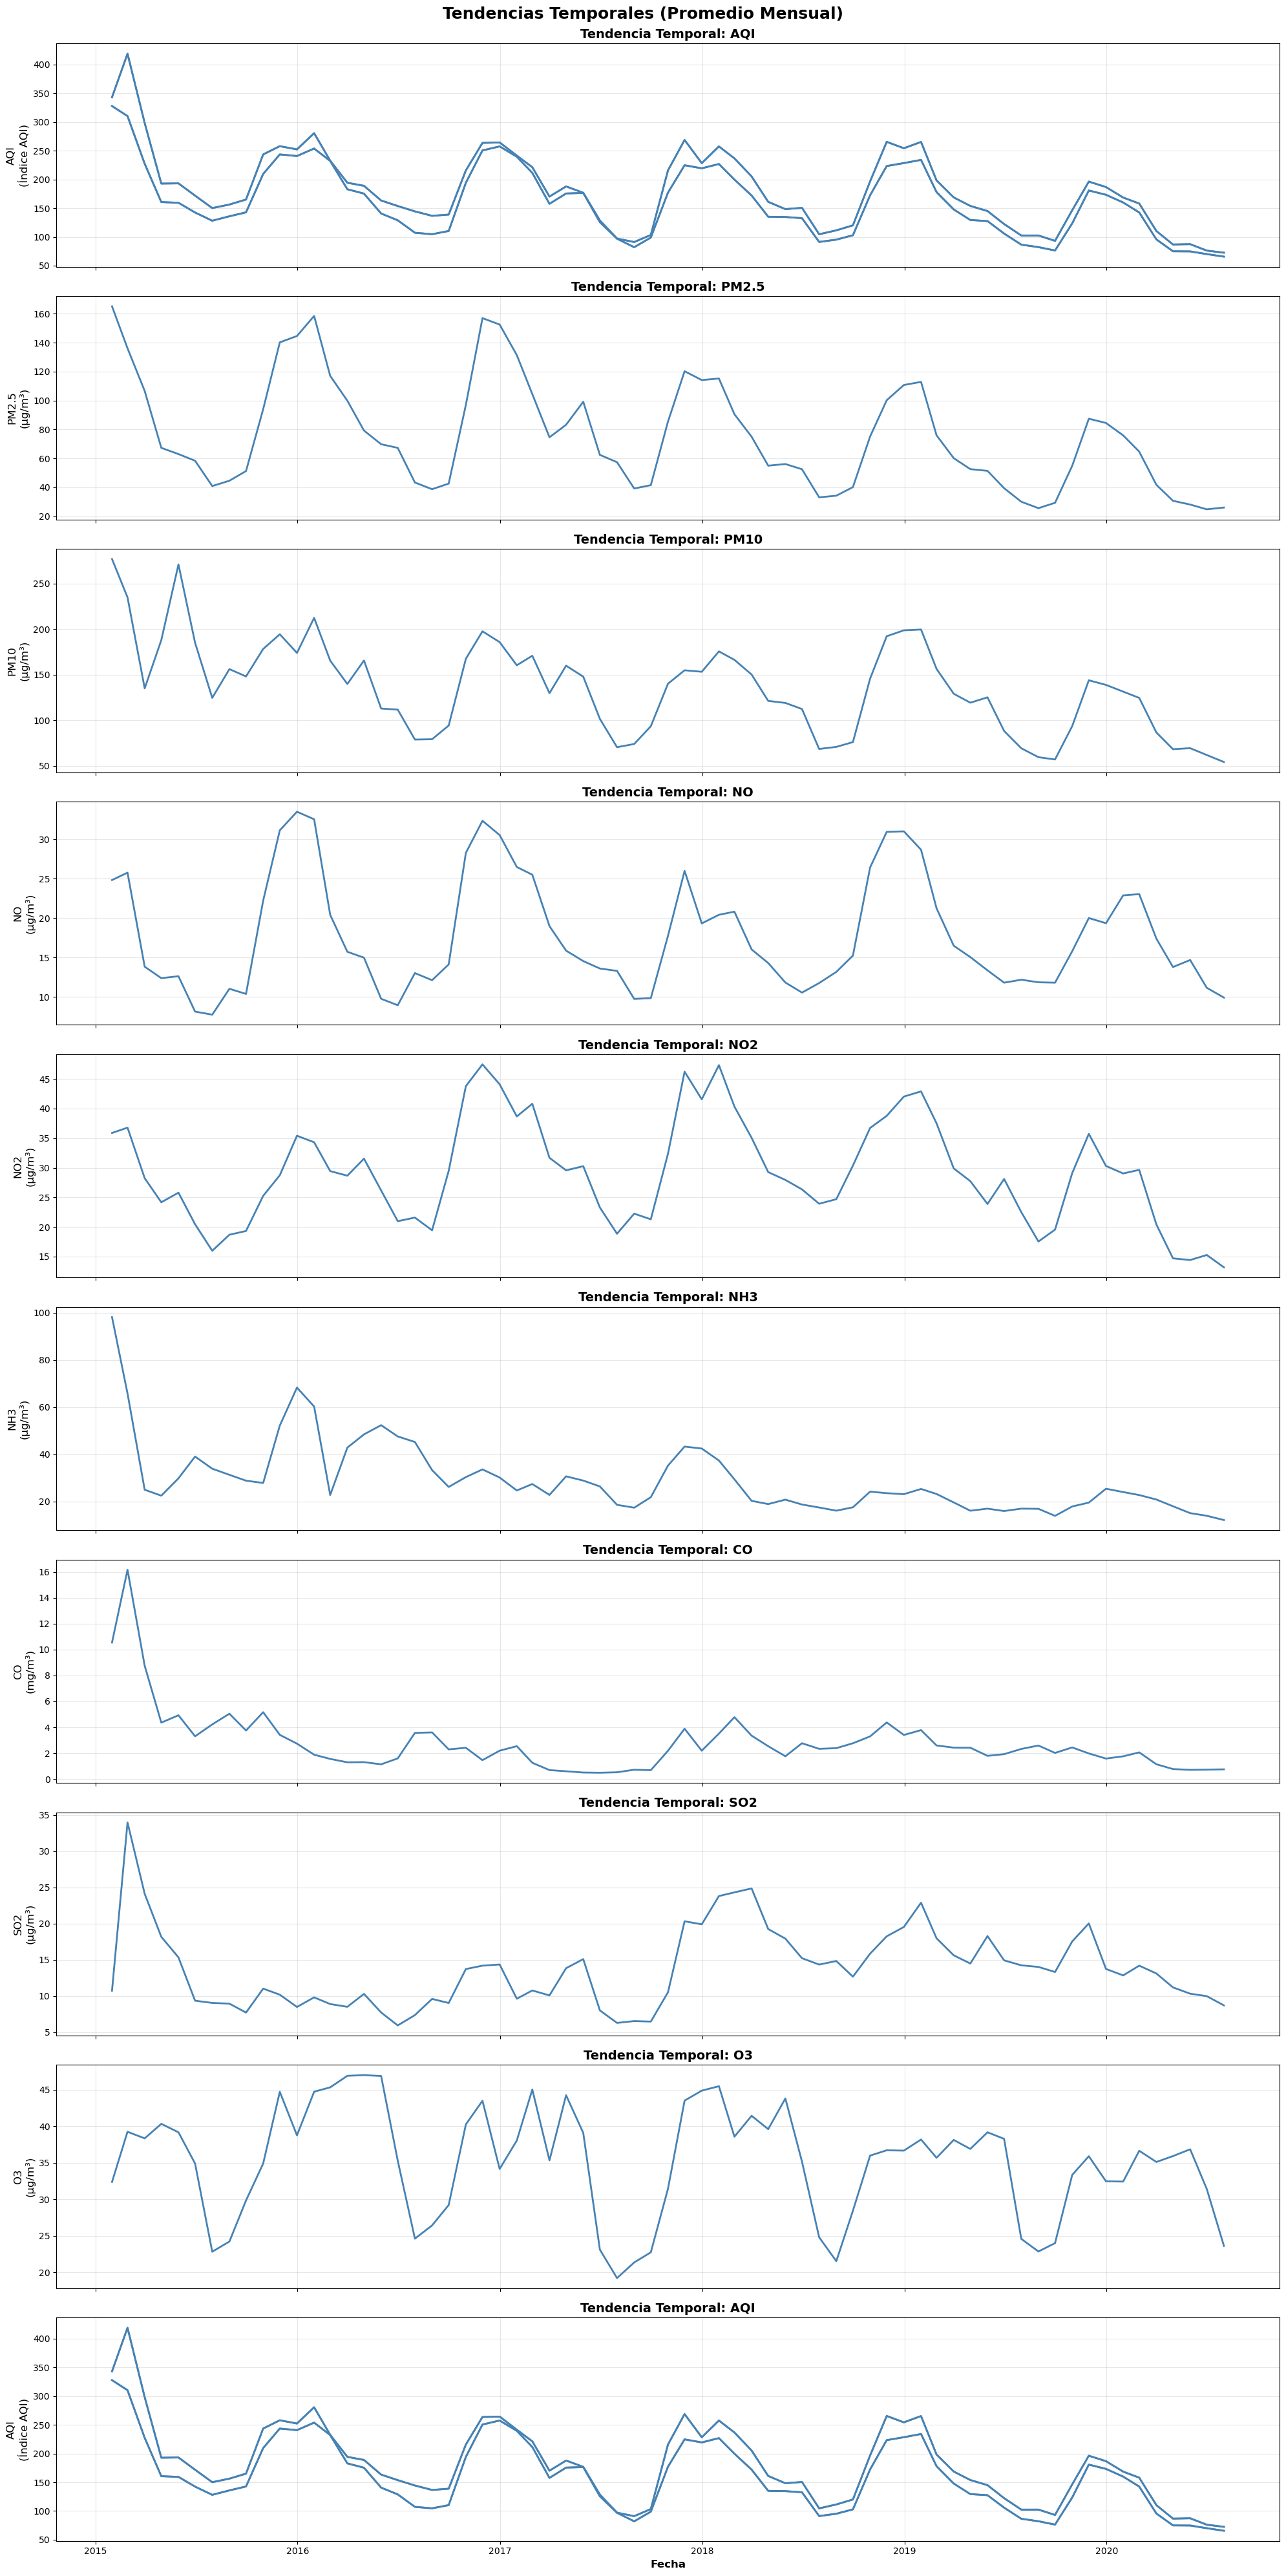

Tiempo de visualización: 2.63s.

--- 2. Dividiendo datos (80/20 cronológico) ---
División: 20540 entrenamiento, 5135 prueba.
Tiempo de ejecución: 0.01s.

--- 3. Separando Características (X) y Objetivo (y) ---
Tiempo de ejecución: 0.01s.

INICIANDO FASE DE PREPROCESAMIENTO

--- 4.1. Codificación y obtencion de variables temporales ---
Tiempo de ejecución: 0.03s

--- 4.2. Limpieza de valores atípicos (entrenamiento) ---

--- Datos Antes de Detección de Atípicos ---


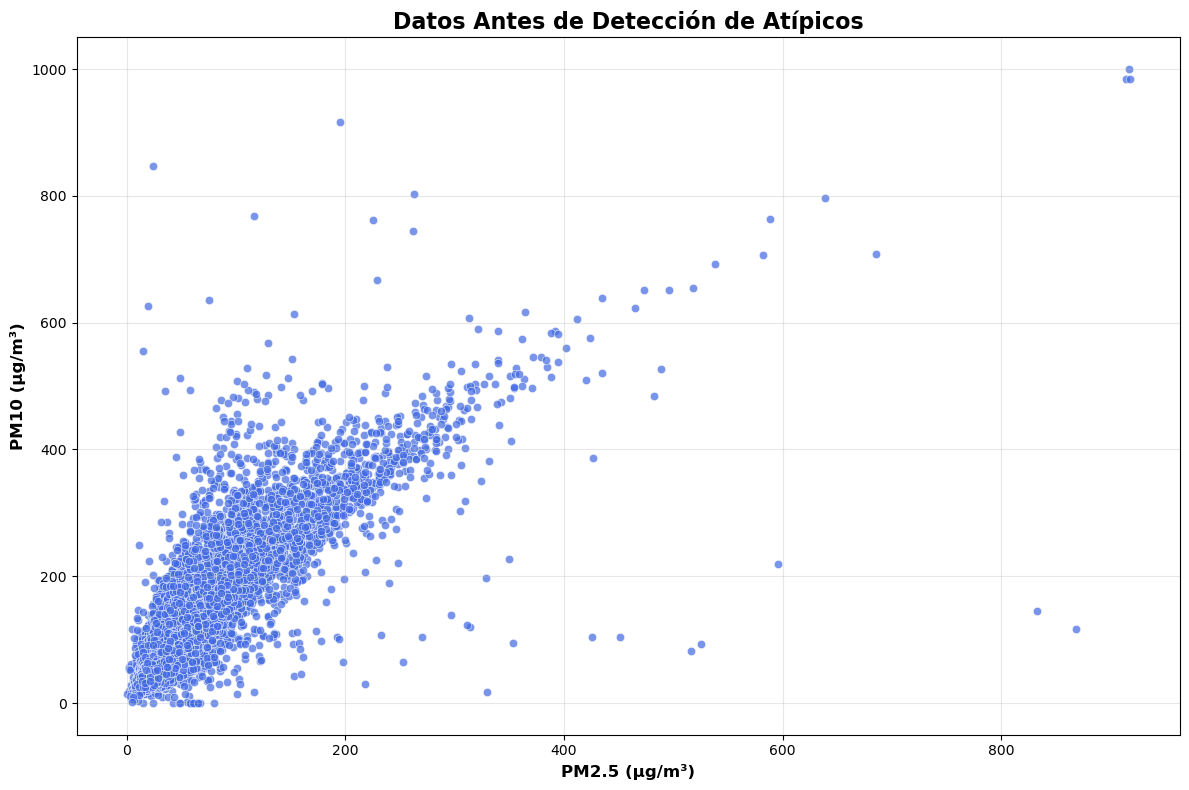

Tiempo de visualización: 0.29s.

--- Identificación de Atípicos ---


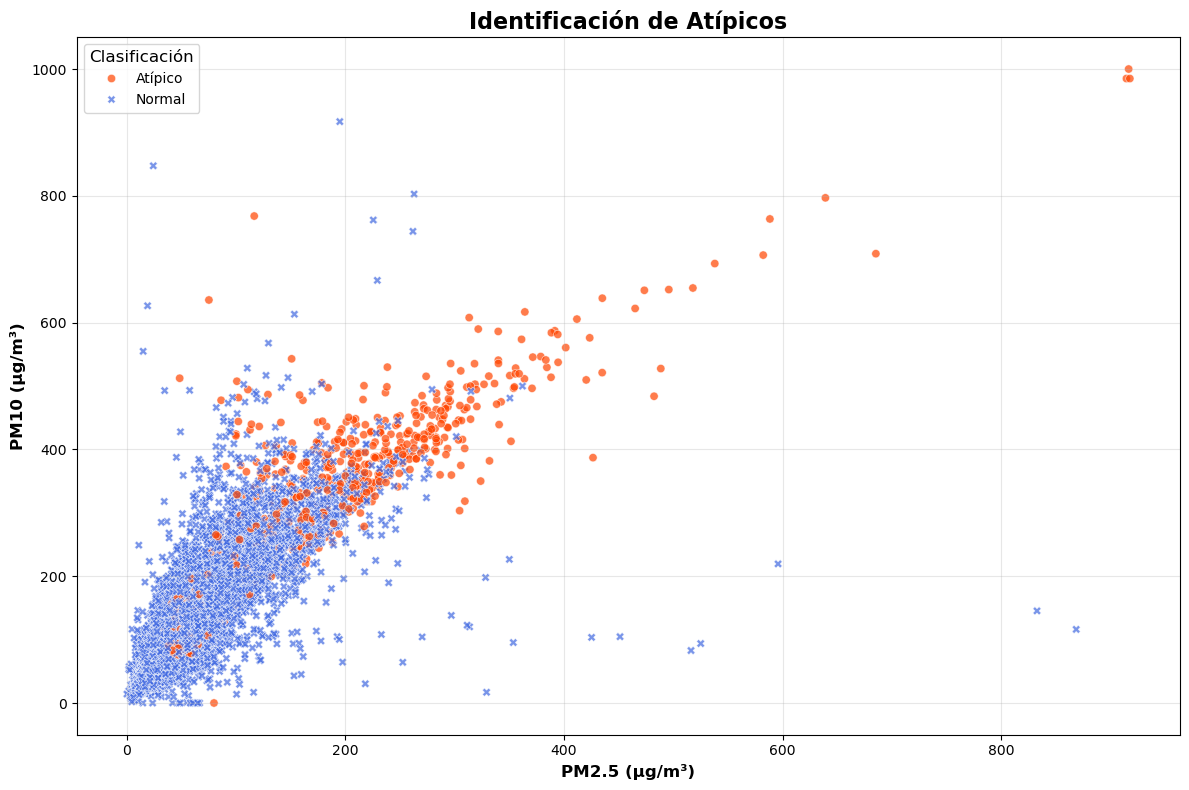

Tiempo de visualización: 1.39s.
   Reducción de 20540 a 19513 filas.
Tiempo de ejecución: 2.33s

--- 4.3. Imputación con IterativeImputer ---
Tiempo de ejecución: 18.11s

--- Análisis de valores NaN: Set de Entrenamiento (Después de Limpieza) ---
No existen valores NaN en las variables principales.

--- 5. Aplicando transformación logarítmica al objetivo (AQI) ---
Tiempo de ejecución: 0.00s

--- 6. Recombinando datos procesados ---
Forma de datos_entrenamiento_finales: (19513, 14)
Tiempo de ejecución: 0.00s

--- Mapa de Calor - Correlaciones (Variables Principales) ---


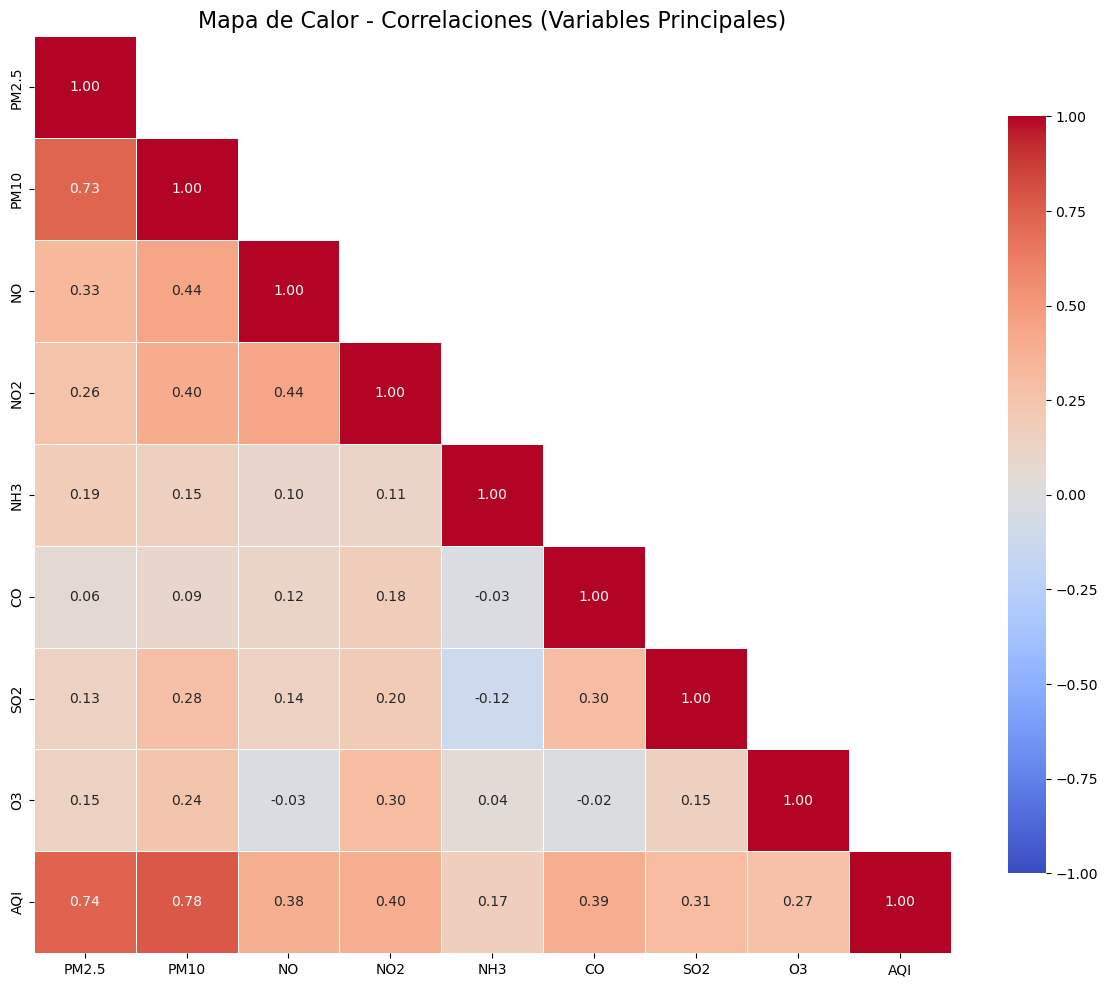

Tiempo de visualización: 0.34s.

--- Relación Variables Principales vs AQI Después del Procesamiento ---


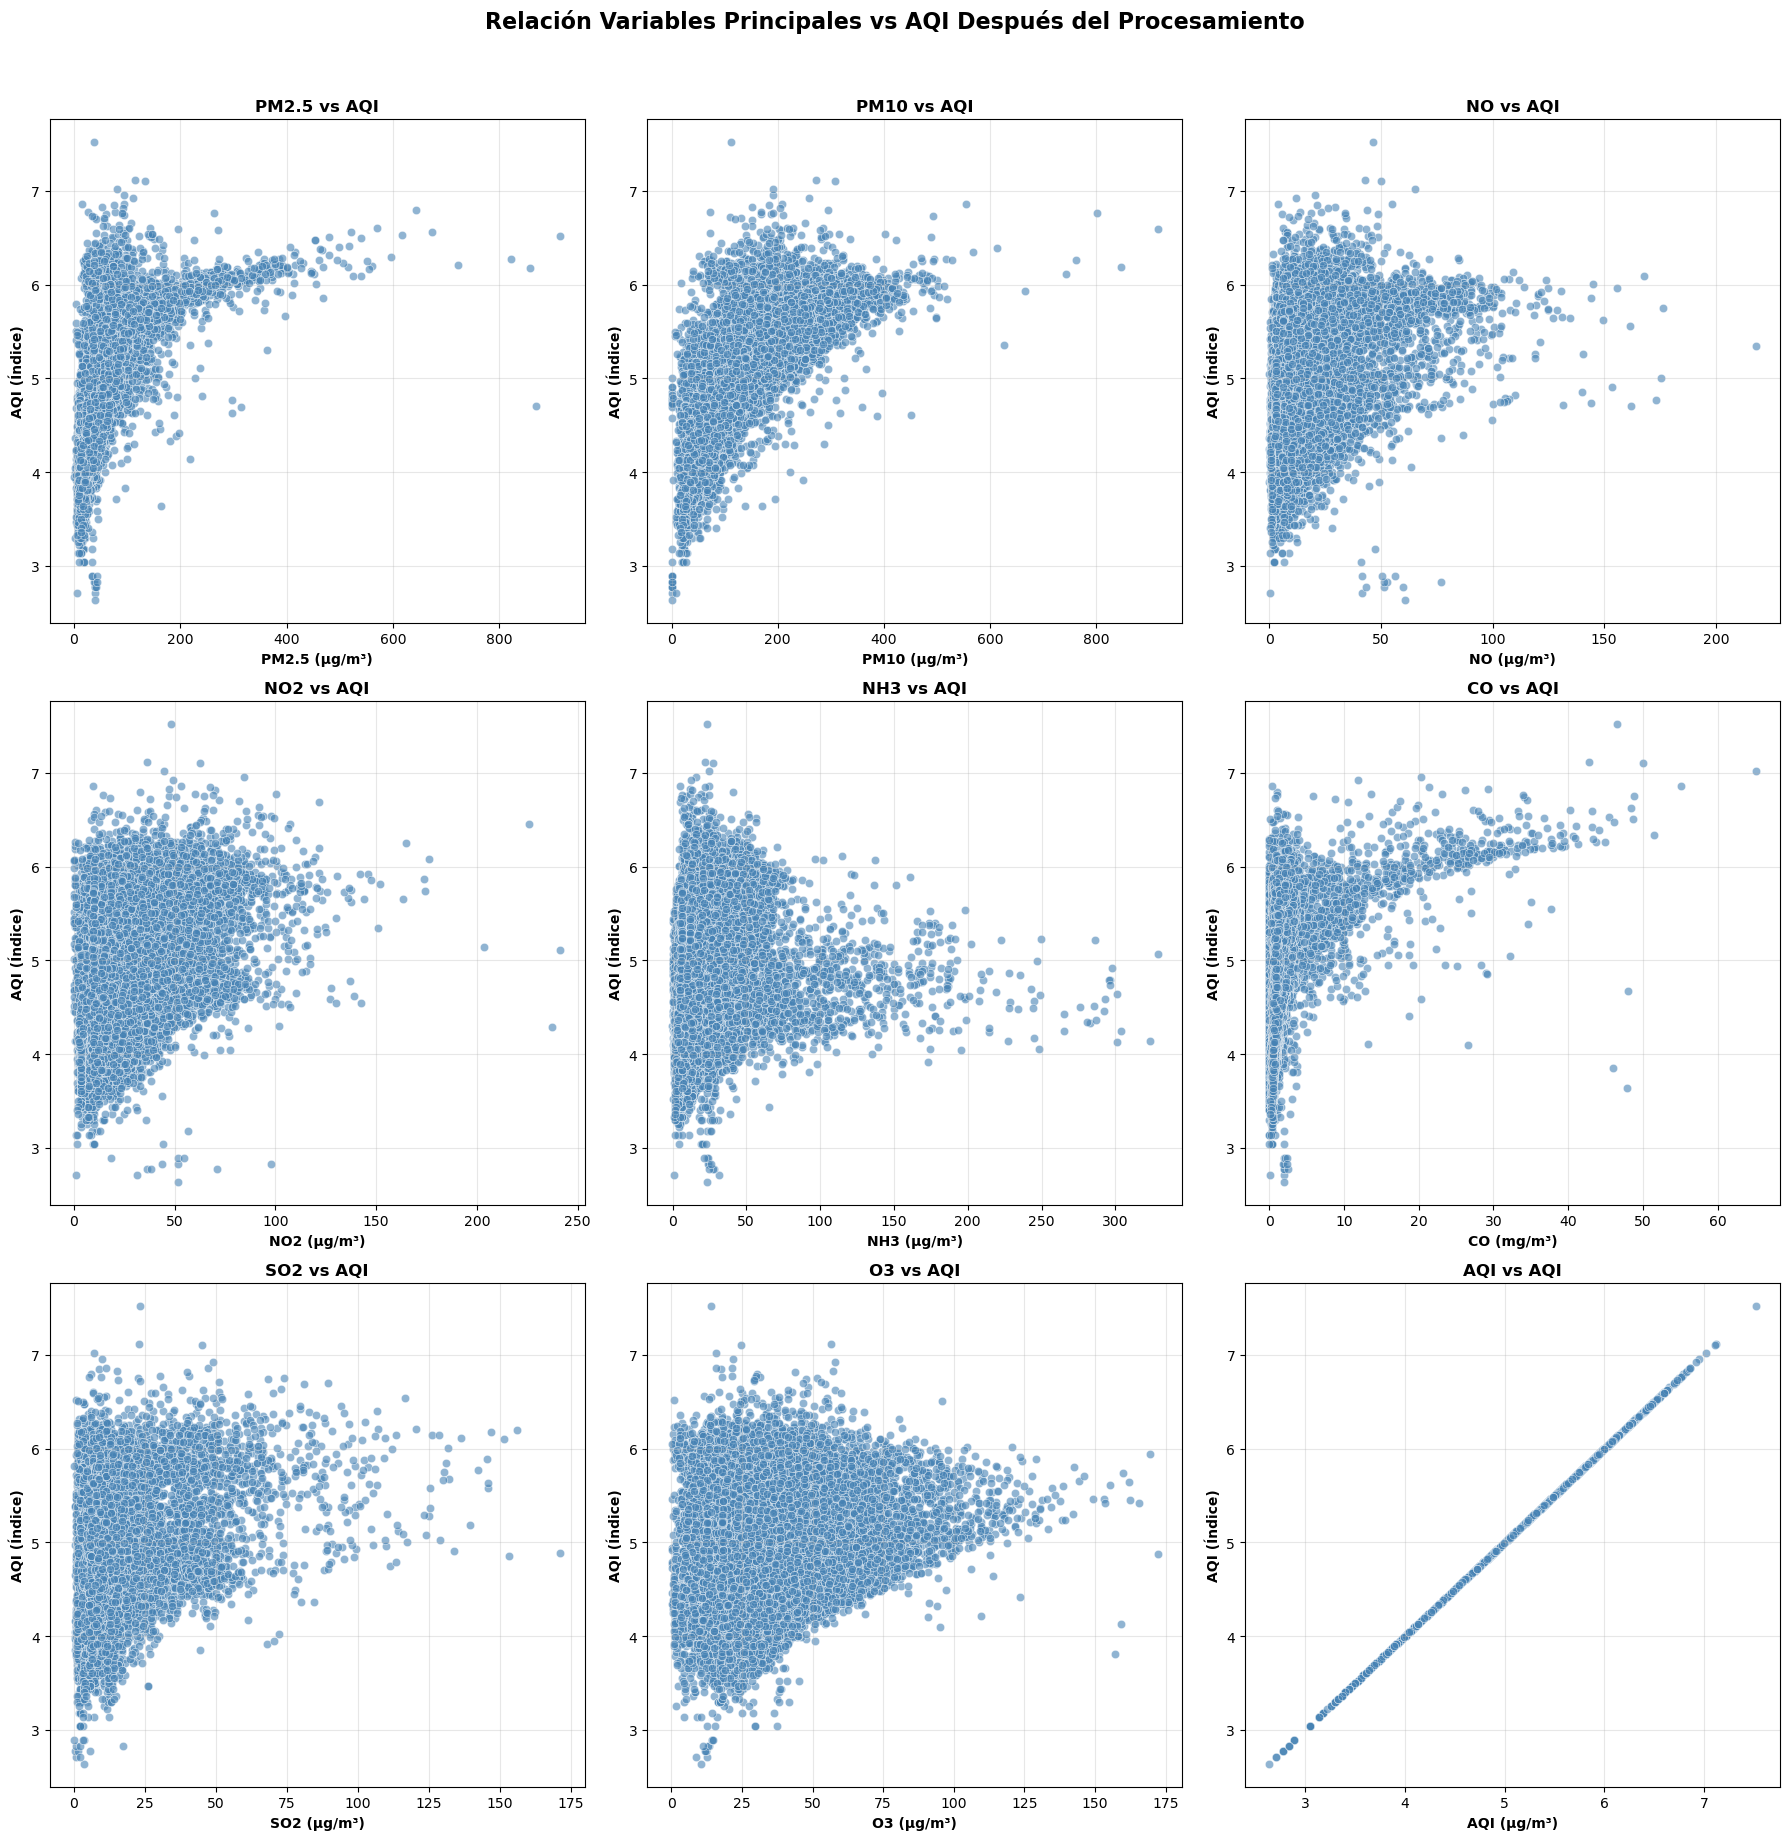

Tiempo de visualización: 1.74s.

--- 7. Guardando artefactos y datos finales ---
Se han guardado los archivoss.
Tiempo de ejecución: 0.67s

INICIANDO FASE DE MODELADO Y EVALUACIÓN

--- Preparando datos para el entrenamiento ---
Formas de: X_train=(19513, 13), X_test=(5135, 13)
Tiempo de ejecución: 0.00s

--- Entrenando el modelo LightGBM ---
Tiempo de entrenamiento: 0.97s.

--- Evaluación y Visualización de Resultados ---
Métricas (sobre 4986 filas): MAE: 16.41, RMSE: 31.86, R²: 0.876


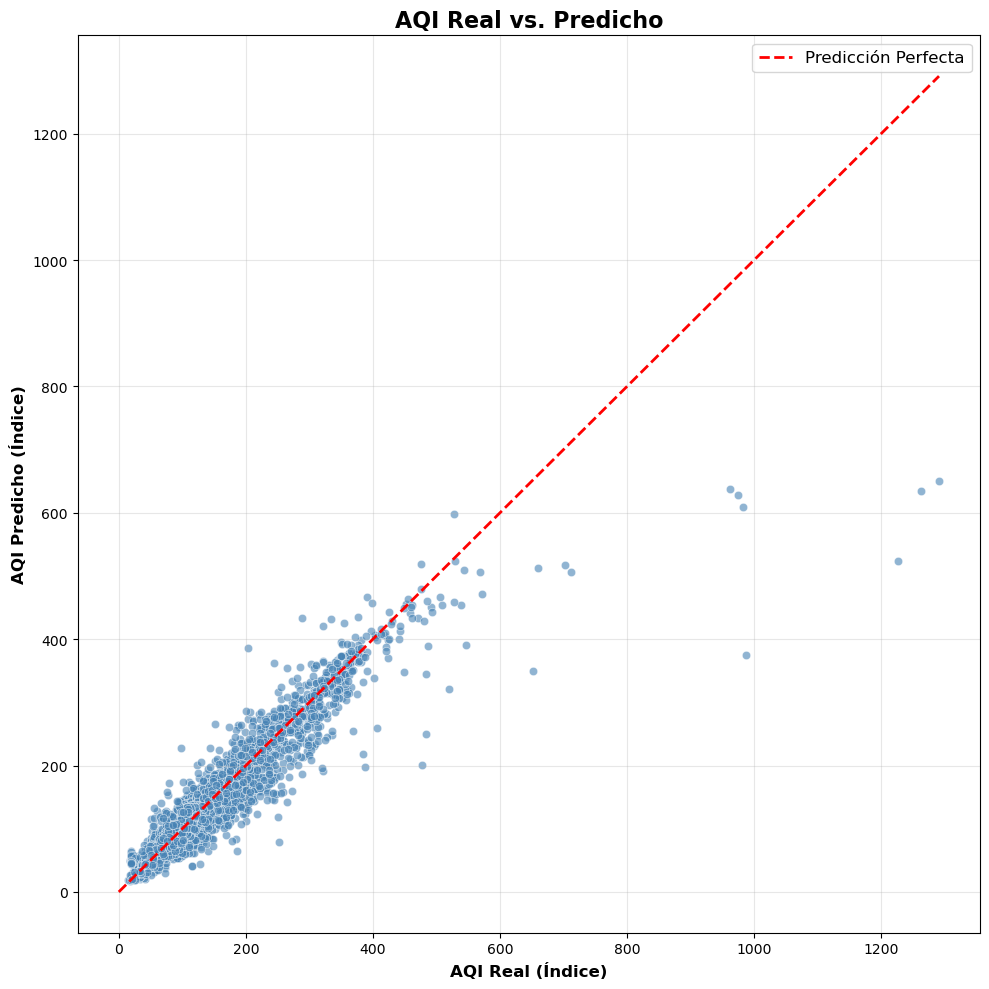

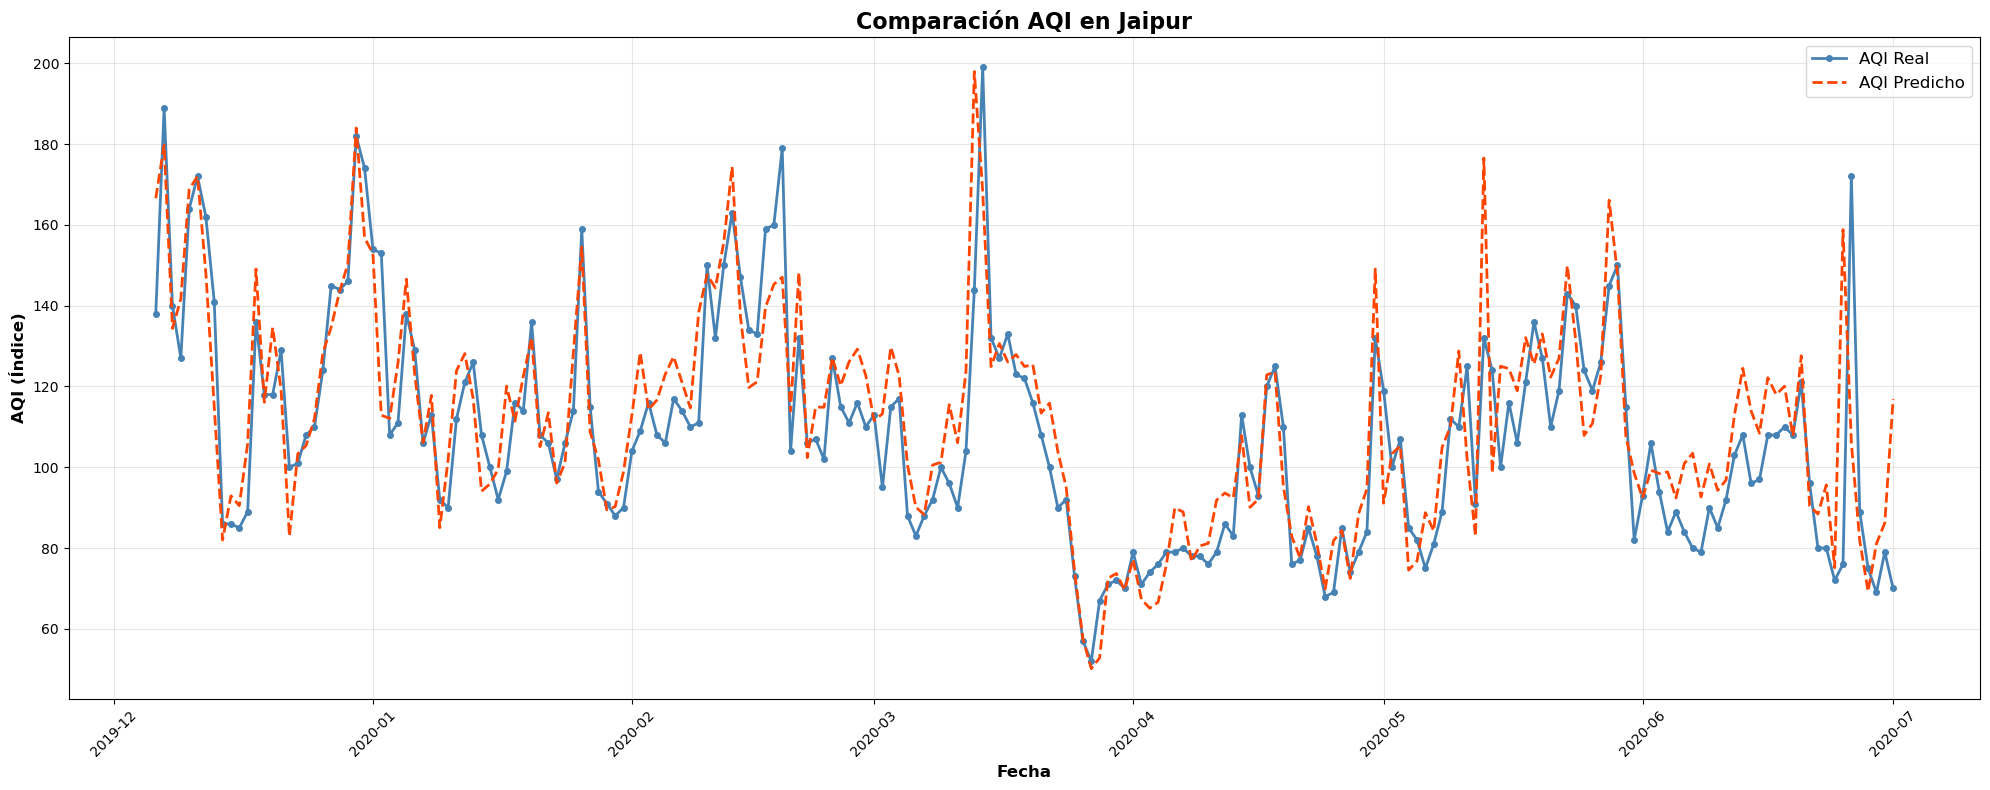

Tiempo de evaluación: 0.52s

--- Guardando modelo final y residuos ---
Guardado exitoso.
Tiempo de ejecución: 0.03s

PIPELINE COMPLETADO EXITOSAMENTE


In [50]:


RUTA_ARCHIVO_DATOS = 'Archivos No Imputados/city_day.csv'
NOMBRE_COLUMNA_OBJETIVO = 'AQI'
# Constantes del datoframe
COLUMNAS_CARACTERISTICAS_INICIALES = ['PM2.5','PM10','NO','NO2','NH3','CO','SO2','O3','City','Date']
COLUMNAS_PARA_ANALISIS_Y_IMPUTACION = ['PM2.5','PM10','NO','NO2','NH3','CO','SO2','O3','City_encoded','dayofweek','dayofyear','month','year']

# Variables principales
VARIABLES_PRINCIPALES = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

# Ejecución de las funciones del pipelin
print("="*80)
print("INICIANDO PIPELINE DE PROCESAMIENTO Y MODELADO DE AQI")
print("="*80)

# FASE DE PREPARACIÓN Y ANÁLISIS INICIAL
rangos_aqi = obtener_rangos_aqi()
datos_con_aqi = cargar_y_crear_valor_real(RUTA_ARCHIVO_DATOS, rangos_aqi)

# Visualizacion de los valores NaNs antes de limpieza/imputación
visualizar_valores_nan(datos_con_aqi, "DataFrame Inicial (Antes de Limpieza)", VARIABLES_PRINCIPALES)

# Visualizacion de las tendencias temporales
visualizar_tendencias_temporales(datos_con_aqi, VARIABLES_PRINCIPALES)

datos_entrenamiento, datos_prueba = dividir_datos_cronologicamente(datos_con_aqi)
X_entrenamiento, y_entrenamiento, X_prueba, y_prueba = separar_caracteristicas_y_objetivo(
    datos_entrenamiento, datos_prueba, COLUMNAS_CARACTERISTICAS_INICIALES, NOMBRE_COLUMNA_OBJETIVO
)

# FASE DE PREPROCESAMIENTO
print("\n" + "="*80)
print("INICIANDO FASE DE PREPROCESAMIENTO")
print("="*80)

X_entrenamiento_codificado, X_prueba_codificado, codificador_ordinal = codificar_y_crear_caracteristicas_temporales(
    X_entrenamiento, X_prueba
)

# Visualizacion de los valores atípicos antes y después
X_entrenamiento_sin_atipicos, indices_datos_limpios = identificar_y_eliminar_valores_atipicos(
    X_entrenamiento_codificado, COLUMNAS_PARA_ANALISIS_Y_IMPUTACION, mostrar_graficos=True
)

y_entrenamiento_limpio = y_entrenamiento.loc[indices_datos_limpios]

X_entrenamiento_imputado, X_prueba_imputado, imputador_iterativo = imputar_valores_faltantes(
    X_entrenamiento_sin_atipicos, X_prueba_codificado, COLUMNAS_PARA_ANALISIS_Y_IMPUTACION, mostrar_graficos=True
)

# Visualizacion de los valores NaNs después de limpieza/imputación
visualizar_valores_nan(X_entrenamiento_imputado, "Set de Entrenamiento (Después de Limpieza)", VARIABLES_PRINCIPALES)

# Liberación de memoria
gc.collect()

# FASE DE PREPARACIÓN FINAL
y_entrenamiento_logaritmico, y_prueba_logaritmico = aplicar_transformacion_logaritmica(y_entrenamiento_limpio, y_prueba)

print("\n--- 6. Recombinando datos procesados ---")
inicio_tiempo = time.time()
datos_entrenamiento_finales = recombinar_datos_procesados(X_entrenamiento_imputado, y_entrenamiento_logaritmico, NOMBRE_COLUMNA_OBJETIVO)
datos_prueba_finales = recombinar_datos_procesados(X_prueba_imputado, y_prueba_logaritmico, NOMBRE_COLUMNA_OBJETIVO)
print(f"Forma de datos_entrenamiento_finales: {datos_entrenamiento_finales.shape}")
tiempo_transcurrido = time.time() - inicio_tiempo
print(f"Tiempo de ejecución: {tiempo_transcurrido:.2f}s")

# Visualizacion de las correlaciones después del procesamiento
visualizar_mapa_correlaciones(datos_entrenamiento_finales, "Mapa de Calor - Correlaciones (Variables Principales)", VARIABLES_PRINCIPALES)

# Visualizacion de las Relaciones entre variables principales y AQI después del procesamiento
visualizar_relacion_variables_con_aqi(datos_entrenamiento_finales, VARIABLES_PRINCIPALES, NOMBRE_COLUMNA_OBJETIVO, 
                                     "Relación Variables Principales vs AQI Después del Procesamiento")

guardar_artefactos_y_datos(codificador_ordinal, imputador_iterativo, datos_entrenamiento_finales, datos_prueba_finales)

# FASE DE MODELADO Y EVALUACIÓN
print("\n" + "="*80)
print("INICIANDO FASE DE MODELADO Y EVALUACIÓN")
print("="*80)

X_entrenamiento_modelo, y_entrenamiento_modelo, X_prueba_modelo, y_prueba_modelo = preparar_datos_para_modelo(
    datos_entrenamiento_finales, datos_prueba_finales, NOMBRE_COLUMNA_OBJETIVO
)

modelo_lightgbm = entrenar_modelo_lightgbm(X_entrenamiento_modelo, y_entrenamiento_modelo, X_prueba_modelo, y_prueba_modelo)

modelo_final, metricas_evaluacion, valores_reales_aqi, valores_predichos_aqi = evaluar_modelo_y_crear_visualizaciones(
    modelo_lightgbm, X_prueba_modelo, y_prueba_modelo, datos_con_aqi, ciudad_ejemplo='Jaipur'
)

guardar_modelo_final_y_residuos(modelo_final, valores_reales_aqi, valores_predichos_aqi)
    
print("\n" + "="*80)
print("PIPELINE COMPLETADO EXITOSAMENTE")
print("="*80)

<h2 style="text-align: left; color: red;">Modelamiento con LightGBM</h2>

<h3 style="text-align: left; color: red;">Función para preparar los datos en la creación del gráfico</h3>

In [51]:
def preparar_datos_para_grafico(valores_reales, valores_predichos, indices_prueba, datos_originales, ciudad_deseada, dias_historicos, dias_pronostico):
    '''
    Realiza el filtrado de los datos, los une y los divide en períodos históricos para la visualizacion del pronóstico AQI.
    Filtra, une y divide los datos para la visualización del pronóstico.


    Parametros:
    valores_reales: array
        Valores reales del AQI
    valores_predichos: array
        Valores predichos del AQI
    indices_prueba: pd.Index
        Índices del conjunto de prueba
    datos_originales: pd.DataFrame
        Datos del DataFrame original
    ciudad_deseada: str
        Nombre de la ciudad a visualizar
    dias_historicos: int
        Número de días históricos a visualizar en la grafica
    dias_pronostico: int
        Número de días de pronóstico a visualizar en la grafica

    Retorna:
    df_historico: pd.DataFrame o None
        DataFrame con los datos históricos para realizar la gráfica
    df_pronostico: pd.DataFrame o None
        DataFrame con los datos del pronóstico para realizar la gráfica
    '''
    print(f"\n1. Preparando los datos para la ciudad: {ciudad_deseada}...")
    inicio = time.time()

    df_resultados = pd.DataFrame({
        'AQI_Real': valores_reales,
        'AQI_Predicho': valores_predichos
    }, index=indices_prueba)
    
    df_completo = datos_originales.loc[indices_prueba].copy().join(df_resultados)
    df_completo.dropna(subset=['AQI_Real', 'AQI_Predicho'], inplace=True)

    if df_completo.empty:
        print("Error: No hay datos para graficar después de unir y limpiar.")
        return None, None

    df_ciudad = df_completo[df_completo['City'] == ciudad_deseada].sort_values('Date').reset_index(drop=True)

    if df_ciudad.empty:
        print(f"Error: No se encontraron datos para la ciudad '{ciudad_deseada}'.")
        ciudades_disponibles = sorted(df_completo['City'].unique())
        print(f"Ciudades disponibles: {', '.join(ciudades_disponibles[:10])}{'...' if len(ciudades_disponibles) > 10 else ''}")
        return None, None
        
    total_datos = len(df_ciudad)
    punto_inicio_pronostico = max(0, total_datos - dias_pronostico)
    punto_inicio_historico = max(0, punto_inicio_pronostico - dias_historicos)

    df_historico = df_ciudad.iloc[punto_inicio_historico:punto_inicio_pronostico]
    df_pronostico = df_ciudad.iloc[punto_inicio_pronostico:]

    if df_historico.empty or df_pronostico.empty:
        print(f"Error: No hay suficientes datos para la ciudad '{ciudad_deseada}', para separar en {dias_historicos} días históricos y {dias_pronostico} de pronóstico.")
        print(f"Total de datos disponibles: {total_datos}")
        return None, None
        
    fin = time.time()
    print(f"Tiempo de preparación de datos: {fin - inicio:.2f} segundos.")
    return df_historico, df_pronostico
